In [70]:
%matplotlib inline
import pandas as pd
import numpy as np
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [71]:
payroll = pd.read_csv('C:/Users/ravikumar/Downloads/Exercises/datasets/data.csv')

C:\Users\ravikumar\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (4,24,28) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [72]:
payroll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285008 entries, 0 to 285007
Data columns (total 35 columns):
Row ID                          285008 non-null int64
Year                            285008 non-null int64
Department Title                285008 non-null object
Payroll Department              231463 non-null float64
Record Number                   285008 non-null object
Job Class Title                 285008 non-null object
Employment Type                 285008 non-null object
Hourly or Event Rate            263987 non-null object
Projected Annual Salary         285008 non-null object
Q1 Payments                     285008 non-null object
Q2 Payments                     285008 non-null object
Q3 Payments                     285008 non-null object
Q4 Payments                     285008 non-null object
Payments Over Base Pay          285008 non-null object
% Over Base Pay                 285008 non-null object
Total Payments                  285008 non-null object
Base Pay  

The Los Angeles City Controller Office releases payroll information for all city employees on a quarterly basis since 2013.
content: Data includes department titles, job titles, projected annual salaries with breakdowns of quarterly pay, bonuses, and benefits information

In [73]:
payroll.shape

(285008, 35)

   Data Exploration which describes the total number of variables involved to analyse the data
   

In [74]:
payroll.head(5)

,Row ID,Year,Department Title,Payroll Department,Record Number,Job Class Title,Employment Type,Hourly or Event Rate,Projected Annual Salary,Q1 Payments,...,MOU Title,FMS Department,Job Class,Pay Grade,Average Health Cost,Average Dental Cost,Average Basic Life,Average Benefit Cost,Benefits Plan,Job Class Link
0,111391,2014,Water And Power (DWP),NaN,1412316577,Commercial Service Representative,Full Time,NaN,$70386.48,$16129.89,...,NaN,98,1230,NaN,$16842.08,$1282.61,$0.00,$18124.69,DWP,http://per.lacity.org/perspecs/1230.pdf
1,31732,2013,Police (LAPD),4301.0,432728338,Police Officer I,Full Time,$25.12,$52450.56,$11331.00,...,POLICE OFFICERS UNIT,70,2214,A,$11651.40,$898.08,$191.04,$12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
2,27697,2013,Police (LAPD),4301.0,97182506,Police Officer II,Full Time,$42.77,$89303.76,$20036.32,...,POLICE OFFICERS UNIT,70,2214,2,$11651.40,$898.08,$191.04,$12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
3,14136,2013,Harbor (Port of LA),3201.0,950136941,Senior Security Officer,Full Time,$28.75,$60028.96,$15793.88,...,SUPV BLUE COLLAR,42,3184,0,$10710.24,$405.24,$11.40,$11126.88,City,http://per.lacity.org/perspecs/3184.pdf
4,91896,2014,Public Works - Sanitation,7024.0,3230003445,Senior Clerk Typist,Full Time,$30.92,$64553.13,$14700.00,...,CLERICAL UNIT,82,1368,0,$11000.40,$409.68,$11.40,$11421.48,City,http://per.lacity.org/perspecs/1368.pdf


In [75]:
payroll.describe

<bound method NDFrame.describe of         Row ID  Year           Department Title  Payroll Department  \
0       111391  2014      Water And Power (DWP)                 NaN   
1        31732  2013              Police (LAPD)              4301.0   
2        27697  2013              Police (LAPD)              4301.0   
3        14136  2013        Harbor (Port of LA)              3201.0   
4        91896  2014  Public Works - Sanitation              7024.0   
5       106560  2014      Water And Power (DWP)                 NaN   
6        59695  2014            Airports (LAWA)               101.0   
7        53269  2013      Water And Power (DWP)                 NaN   
8        71037  2014        Harbor (Port of LA)              3201.0   
9        22672  2013              Police (LAPD)              4301.0   
10       69509  2014           General Services              3362.0   
11      110008  2014      Water And Power (DWP)                 NaN   
12      106631  2014      Water And Power (

The goal of the analysis

1. How do benefits and salaries differ for employees across departments and titles? Are there any unusually large differences between lowest and highest employee salaries?
2. How have salaries changed over the past three years?

In [76]:

payroll = payroll[pd.notnull(payroll['Payroll Department'])]
payroll.rename(columns={'Projected Annual Salary' : 'Annual_sal'}, inplace = True)
payroll.rename(columns={'Job Class Title' : 'Job_title'}, inplace = True)
payroll.rename(columns={'Base Pay' : 'Base_Pay'}, inplace = True)

C:\Users\ravikumar\Anaconda3\lib\site-packages\pandas\core\frame.py:2844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


Assumtions made:

Rename all the variables of columns to other name and avoid null set.
and replace all the $ and null into i variable


In [77]:
for i in ['Annual_sal','Q1 Payments','Q2 Payments','Q3 Payments','Q4 Payments','Payments Over Base Pay',
          'Total Payments','Base_Pay','Permanent Bonus Pay','Longevity Bonus Pay','Temporary Bonus Pay','Overtime Pay',
          'Other Pay & Adjustments','Other Pay (Payroll Explorer)','Average Health Cost','Average Dental Cost',
          'Average Basic Life','Average Benefit Cost']:
    payroll[i] = payroll[i].str.replace('$','')

C:\Users\ravikumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [78]:
payroll = payroll[payroll.Annual_sal != 0]  
payroll = payroll[payroll.Base_Pay != 0]
payroll.Annual_sal = payroll.Annual_sal.astype(float)
payroll.Base_Pay = payroll.Base_Pay.astype(float)

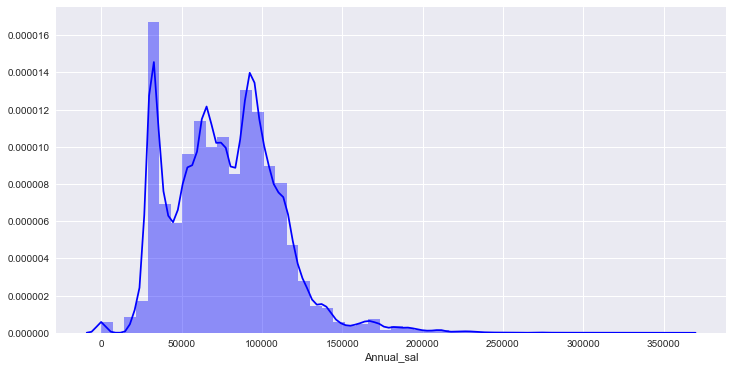

In [79]:
plt.figure(figsize = (12,6))
sns.distplot(payroll.Annual_sal,color = 'blue')

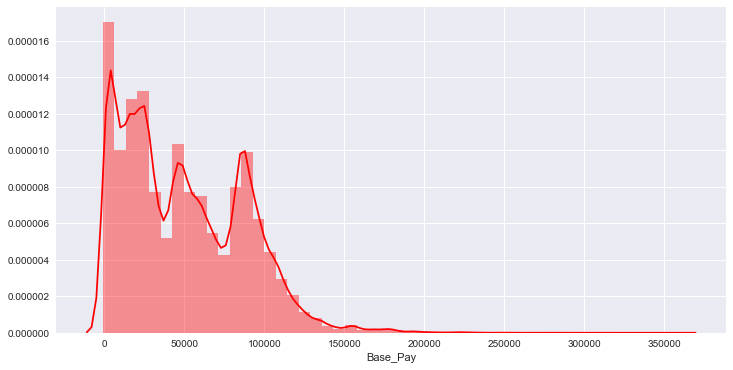

In [80]:
plt.figure(figsize = (12,6))
sns.distplot(payroll.Base_Pay,color = 'red')

In [81]:

payroll_2015 = payroll[payroll.Year ==2015]
payroll_2016 = payroll[payroll.Year ==2016]

In [82]:

pop_mean_2015 = payroll_2015['Annual_sal'].mean()
pop_std_2015 = statistics.stdev(payroll_2015.Annual_sal)
print("Population Mean: "+str(pop_mean_2015))
print("Population Standard Deviation: "+str(pop_std_2015))

Population Mean: 76046.39152505301
Population Standard Deviation: 34232.25489729045


In [83]:
print("Population Mean: "+str(payroll_2016['Annual_sal'].mean()))
payroll_2016_sample = payroll_2016.sample(frac=0.10)
sample_mean_2016 = payroll_2016_sample['Annual_sal'].mean()
print("Sample Mean: "+str(sample_mean_2016))
sample_std_2016 = statistics.stdev(payroll_2016_sample.Annual_sal)
print("Sample Standard Deviation: "+str(sample_std_2016))


Population Mean: 78711.19987225177
Sample Mean: 78400.19535374906
Sample Standard Deviation: 33204.888833274286


In [84]:
import math
# Confidence Level 95 %  for one sided Normal curve
zscore_critical = 1.65 
# Calculate the test statistics 
zscore_test_stat = ((sample_mean_2016 - pop_mean_2015)*math.sqrt(8916))/sample_std_2016
print(zscore_test_stat)

6.693499946287057



Conclusion: As the test statistics fall into the rejection region the null hypothesis is rejected
and it can be concluded that the Annual salaries increase in 2016.
from the expereince we can conclude the mean value and standard deviation are very distinct 